In [1]:
!retinanet-convert-model /home/aiffel0049/aiffel/Going_Deeper/3.object_detection/snapshots/resnet50_csv_50.h5 /home/aiffel0049/aiffel/Going_Deeper/3.object_detection/snapshots/resnet50_csv_50_infer.h5

2020-11-05 14:47:46.280503: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-05 14:47:47.098106: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-05 14:47:47.128271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-05 14:47:47.128767: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2070 computeCapability: 7.5
coreClock: 1.455GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 327.88GiB/s
2020-11-05 14:47:47.128785: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-05 14:47:47.129747: I tensorflow/stream_executor/platform

In [2]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.models import load_model
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

gpu = '0'
setup_gpu(gpu)


model_path = os.path.join('.', 'snapshots', 'resnet50_csv_50_infer.h5')
model = load_model(model_path, backbone_name='resnet50')

Using TensorFlow backend.


1 Physical GPUs, 1 Logical GPUs


[192.82245 134.65948 358.29633 232.81595]
[593.43677 174.65504 625.45984 206.13101]
[374.55106 184.81648 416.64554 208.05188]
[665.9963  160.70413 728.17706 192.8497 ]
[441.59064 172.8302  472.63873 197.42387]
[534.515   160.24278 563.60455 190.03915]


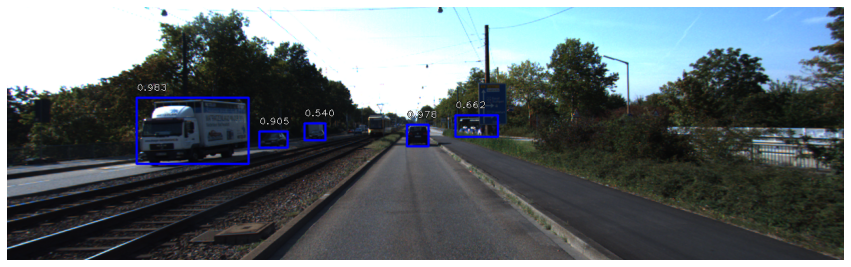

In [3]:
import os
img_path = '/home/aiffel0049/aiffel/Going_Deeper/3.object_detection/test_set/go_1.png'

# inference_on_image 함수를 구현해 주세요.
def inference_on_image(model, img_path="./test_set/go_0.png", visualize=True):
    image = read_image_bgr(img_path)

    # TODO: copy image to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    
    color_map = {
        0:(0, 0, 255),  # blue
        1:(255, 0, 0)  # red
    }
    # TODO: preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)
    # TODO: process image
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

    # TODO: correct for image scale
    boxes /= scale

    # TODO: display images
    if visualize:
        for box, score, label in zip(boxes[0], scores[0], labels[0]):
            print(box)
            if score < 0.5:
                break
            b = box.astype(int)
            draw_box(draw, b, color=color_map[label])
            
            caption = '{:.3f}'.format(score)
            draw_caption(draw, b, caption)
        
        plt.figure(figsize = (15,15))
        plt.axis('off')
        plt.imshow(draw)
        plt.show()

inference_on_image(model, img_path=img_path)

[770.73846 143.71938 844.2422  315.81702]
[773.49194 144.29723 843.00977 308.15228]


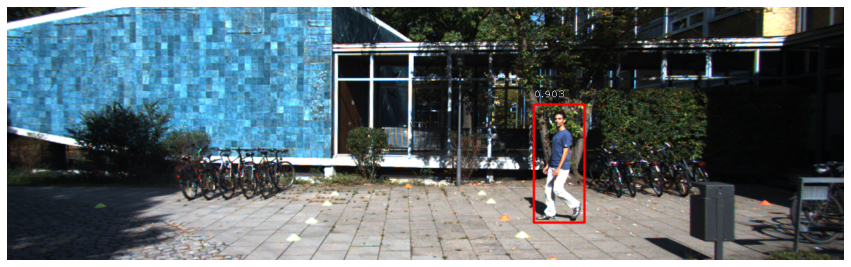

In [4]:
img_path = '/home/aiffel0049/aiffel/Going_Deeper/3.object_detection/test_set/stop_1.png'
inference_on_image(model, img_path=img_path)